# 04-eff-n-issues-times

In [14]:
import os
import glob
import numpy as np
import pandas as pd
from itertools import *

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.figsize'] = [7,8]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 17
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10

sns.set_context('poster')

from pprint import pprint
from dateutil.parser import parse
from datetime import datetime
import time

import imp

from scipy.stats import entropy
entropy_fix = np.log2(np.e)

In [6]:
all_n_topics = [10, 15, 20, 25, 50]

In [8]:
def calc_week(x):
    d1 = parse(x)
    d0 = datetime(d1.year,1,1,0,0)
    d_gap = d1-d0
    week = d_gap.days/7 + 1
    return int(week)

In [ ]:
df_allnews = pd.DataFrame()
OCR_folder = 'scraping_times/data/OCRtext/'
newscodes_folder = 'scraping_times/data/codes_for_only_News/'
columns = ['pubdate', 'headline', 'text', 'id']

min_file_size = 1000 # bytes
yearrange = range(1947,2013)

for year in yearrange:
    
    newscodes_filenames = glob.glob(newscodes_folder + str(year) + '*')
    filecodes_news = []
    for infile in newscodes_filenames:
        with open(infile) as f:
            filecodes_news += f.read().split()
    
    all_infiles = glob.glob(OCR_folder + str(year) + '*/*')
    to_df = []
    for infile in all_infiles:
        file_size = os.stat(infile).st_size # in bytes
        if file_size > min_file_size:
            
            with open(infile) as f:
                lines = [ i[:-1] for i in f.readlines()[2:] ]
                headline = lines[0]
                pubdate = infile.split('/')[3]
                text = ' '.join(lines[1:])
                filename = pubdate+'/'+infile.split('/')[-1]
              
                filecode = filename.split('_')[-1][:-4]
                IS_NEWS = ( filecode in filecodes_news )
                HAS_ENOUGH_TEXT = (len(text) > 50)
                
                if IS_NEWS and HAS_ENOUGH_TEXT:
                    to_df += [( pubdate, headline, text, filename )]
                    
    print("%d newspieces in %d" % (len(to_df),year))                
    df_allnews = df_allnews.append(pd.DataFrame(to_df,columns=columns),ignore_index=True)

df_allnews['year']  = df_allnews['pubdate'].apply( lambda x: int(x[:4]) )
df_allnews['month'] = df_allnews['pubdate'].apply( lambda x: int(x[5:7]) )
df_allnews['week']  = df_allnews['pubdate'].apply( lambda x: calc_week(x) ) 
    
print("%d newspieces from %d to %d" % (len(df_allnews), min(yearrange), max(yearrange)) )
df_allnews.head()

In [10]:
doc_to_date = { row.id:(row.year, row.week) for _, row in df_allnews.iterrows() }
#all_dates = set(sorted(doc_to_date.values()))
#all_documents = topics_per_document.index.values

#dates = [ datetime.fromtimestamp(time.mktime(time.strptime('{} {} 1'.format(date[0],date[1]), '%Y %W %w'))) 
#         for date in sorted(all_dates)]

In [12]:
def corrected_entropy(v, filler=1e-5):
    minv = min(v)
    v2 = [ i if i > minv else filler for i in v ]
    return entropy(v2)*entropy_fix

Running for K=10 topics


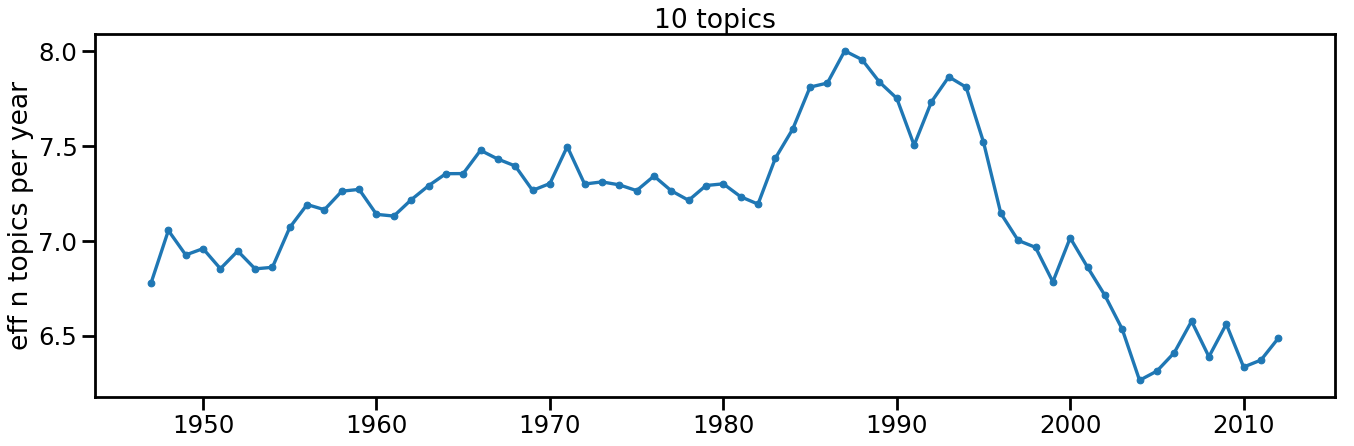

Running for K=15 topics


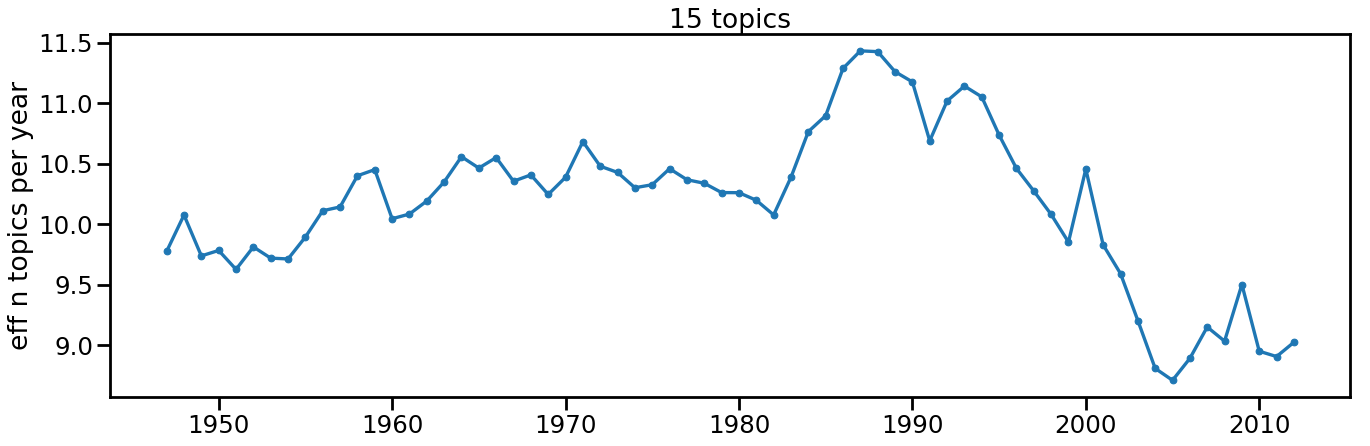

Running for K=20 topics


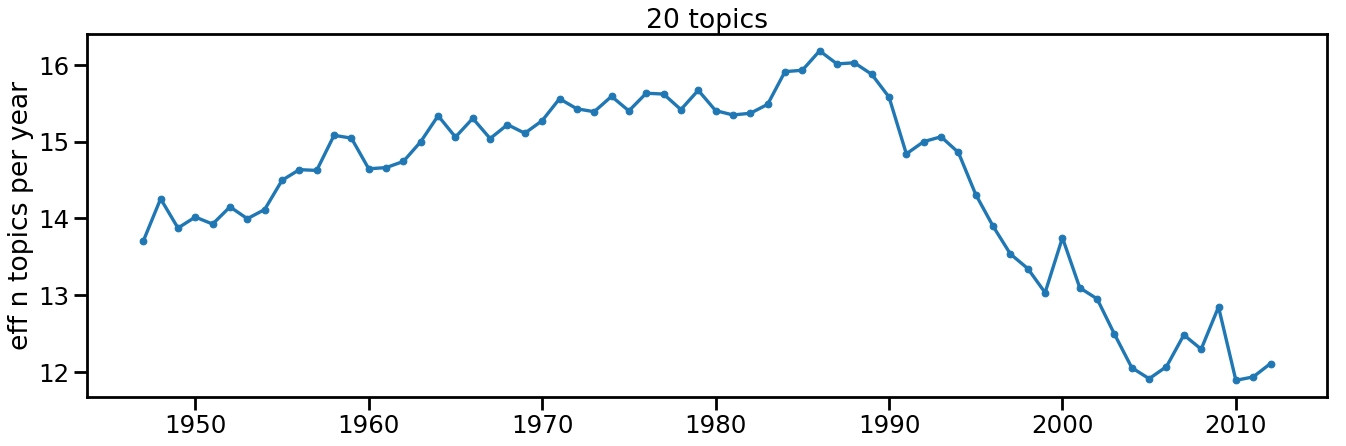

Running for K=25 topics


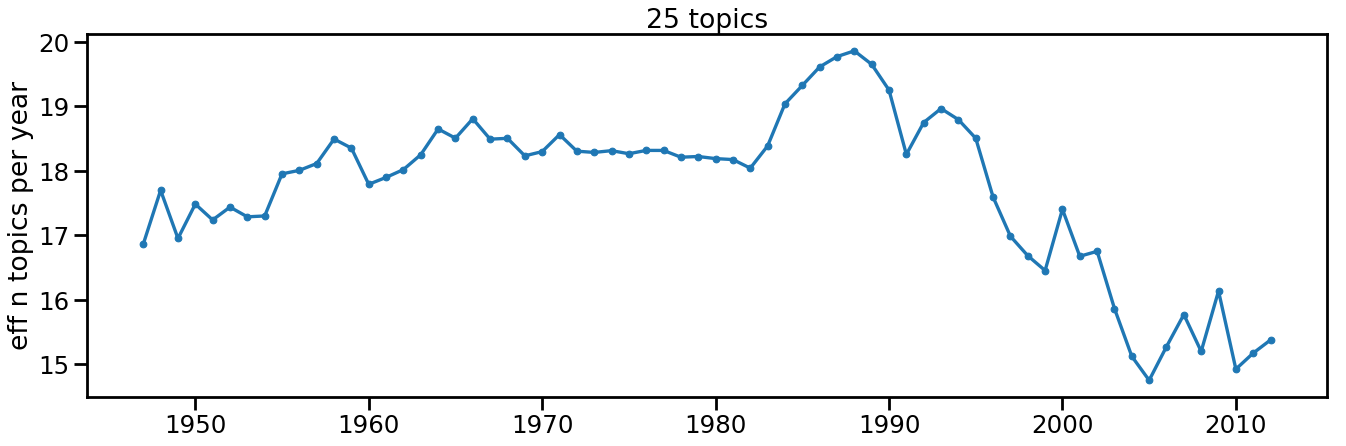

Running for K=50 topics


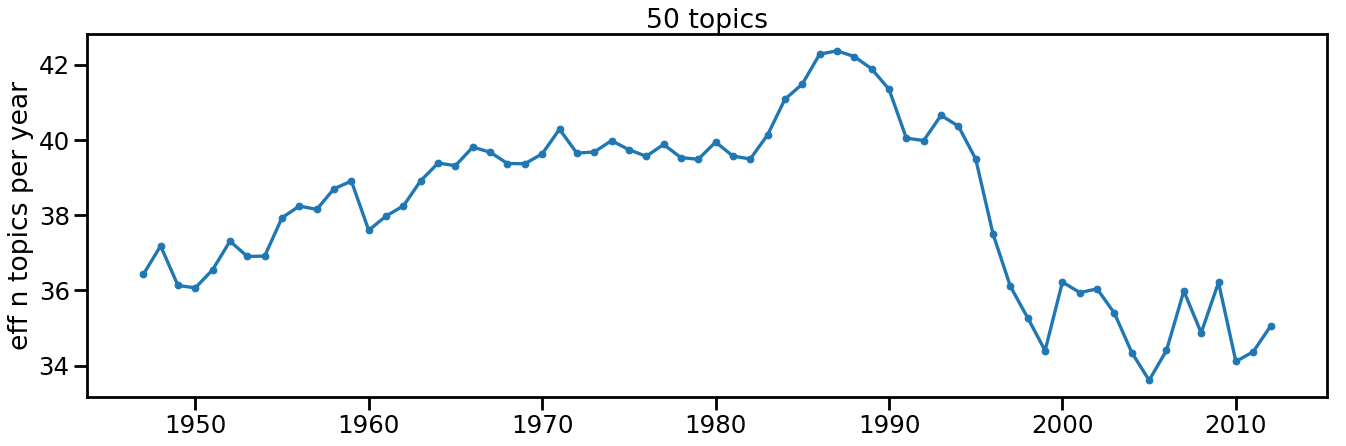

In [16]:
for n_topics in all_n_topics:
    print("Running for K={} topics".format(n_topics))

    topics_per_document = pd.read_csv('times_data/document_topic_distributions_'+str(n_topics)+'topics.csv', index_col=0)
    
    table = topics_per_document

    topics_per_year = {}

    for index, row in table.iterrows():
        topic_array = np.array(row.values,dtype=np.float64)
        if index in doc_to_date:
            year = doc_to_date[index][0]
            if year not in topics_per_year:
                topics_per_year[year]  = topic_array
            else:
                topics_per_year[year] += topic_array

    years = range(1947,2013)
    eff_n_topics_per_year = [ 2**corrected_entropy(topics_per_year[year]) for year in years ]

    plt.figure(figsize=(20,6))
    plt.plot(years, eff_n_topics_per_year, '.-');
    plt.ylabel('eff n topics per year');
    plt.title('{} topics'.format(n_topics))
    plt.savefig('images/eff_n_topics_per_year_{}topics_UK.png'.format(n_topics))
    plt.show()

_____________________

In [61]:
n_topics = 50

words_per_topic     = pd.read_csv('times_data/topic_word_distributions_'+str(n_topics)+'topics.csv', index_col=0)
topics_per_document = pd.read_csv('times_data/document_topic_distributions_'+str(n_topics)+'topics.csv', index_col=0)

In [3]:
def calc_week(x):
    d1 = parse(x)
    d0 = datetime(d1.year,1,1,0,0)
    d_gap = d1-d0
    week = d_gap.days/7 + 1
    return int(week)

In [62]:
df_allnews = pd.DataFrame()
OCR_folder = 'scraping_times/data/OCRtext/'
newscodes_folder = 'scraping_times/data/codes_for_only_News/'
columns = ['pubdate', 'headline', 'text', 'id']

min_file_size = 1000 # bytes
yearrange = range(1947,2013)

for year in yearrange:
    
    newscodes_filenames = glob.glob(newscodes_folder + str(year) + '*')
    filecodes_news = []
    for infile in newscodes_filenames:
        with open(infile) as f:
            filecodes_news += f.read().split()
    
    all_infiles = glob.glob(OCR_folder + str(year) + '*/*')
    to_df = []
    for infile in all_infiles:
        file_size = os.stat(infile).st_size # in bytes
        if file_size > min_file_size:
            
            with open(infile) as f:
                lines = [ i[:-1] for i in f.readlines()[2:] ]
                headline = lines[0]
                pubdate = infile.split('/')[3]
                text = ' '.join(lines[1:])
                filename = pubdate+'/'+infile.split('/')[-1]
              
                filecode = filename.split('_')[-1][:-4]
                IS_NEWS = ( filecode in filecodes_news )
                HAS_ENOUGH_TEXT = (len(text) > 50)
                
                if IS_NEWS and HAS_ENOUGH_TEXT:
                    to_df += [( pubdate, headline, text, filename )]
                    
    print("%d newspieces in %d" % (len(to_df),year))                
    df_allnews = df_allnews.append(pd.DataFrame(to_df,columns=columns),ignore_index=True)

df_allnews['year']  = df_allnews['pubdate'].apply( lambda x: int(x[:4]) )
df_allnews['month'] = df_allnews['pubdate'].apply( lambda x: int(x[5:7]) )
df_allnews['week']  = df_allnews['pubdate'].apply( lambda x: calc_week(x) ) 
    
print("%d newspieces from %d to %d" % (len(df_allnews), min(yearrange), max(yearrange)) )
df_allnews.head()

988 newspieces in 1947
732 newspieces in 1948
1035 newspieces in 1949
2018 newspieces in 1950
1915 newspieces in 1951
2466 newspieces in 1952
2532 newspieces in 1953
2555 newspieces in 1954
2369 newspieces in 1955
1160 newspieces in 1956
1650 newspieces in 1957
1250 newspieces in 1958
1706 newspieces in 1959
1385 newspieces in 1960
2543 newspieces in 1961
1828 newspieces in 1962
2575 newspieces in 1963
1885 newspieces in 1964
3231 newspieces in 1965
2031 newspieces in 1966
3125 newspieces in 1967
1861 newspieces in 1968
3054 newspieces in 1969
1906 newspieces in 1970
1785 newspieces in 1971
2057 newspieces in 1972
1829 newspieces in 1973
1773 newspieces in 1974
1885 newspieces in 1975
2007 newspieces in 1976
3727 newspieces in 1977
2214 newspieces in 1978
81 newspieces in 1979
1738 newspieces in 1980
2709 newspieces in 1981
2441 newspieces in 1982
3375 newspieces in 1983
2798 newspieces in 1984
2794 newspieces in 1985
3056 newspieces in 1986
2376 newspieces in 1987
3124 newspieces in 1

,pubdate,headline,text,id,year,month,week
0,1947-04-30,"4366,000,000 SAVINGS",TARGET LORD MONTGOMERY ON WINNING PROSPERITY F...,1947-04-30/102_GALE_CS119096478.txt,1947,4,18
1,1947-04-30,FATEFUL YEAR FOR CEYLON,SELF-GOVERNMENT UNDER THE SOULBURY SCHEME A LA...,1947-04-30/076_GALE_CS85279902.txt,1947,4,18
2,1947-04-30,ECCLESIASTICAL NEWS,"THE QUEEN AND THE MOTHERS' UNION On March 25, ...",1947-04-30/103_GALE_CS119227550.txt,1947,4,18
3,1947-04-30,PLANS FOR WEST,GERMANY NO SEPARATE STATE GEN. ROBERTSON ON EC...,1947-04-30/055_GALE_CS68502686.txt,1947,4,18
4,1947-04-30,Parliament,LOCAL AUTHORITY TRANSPORT BASIS OF ADDITIONAL ...,1947-04-30/117_GALE_CS134431902.txt,1947,4,18


In [63]:
def corrected_entropy(v, filler=1e-5):
    minv = min(v)
    v2 = [ i if i > minv else filler for i in v ]
    return entropy(v2)*entropy_fix

In [64]:
table = topics_per_document

all_entropies = []
n_issues = []

for index, row in table.iterrows():
    topic_array = np.array(row.values,dtype=np.float64)
    all_entropies += [ corrected_entropy(topic_array) ]
    n_issues      += [ sum(row.values>0) ]

all_entropies = np.array(all_entropies)
n_issues      = np.array(n_issues)

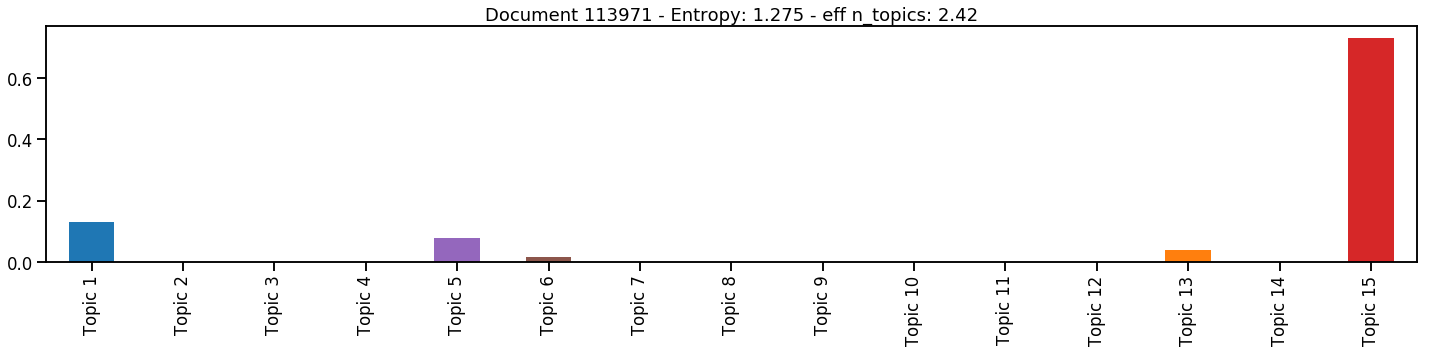

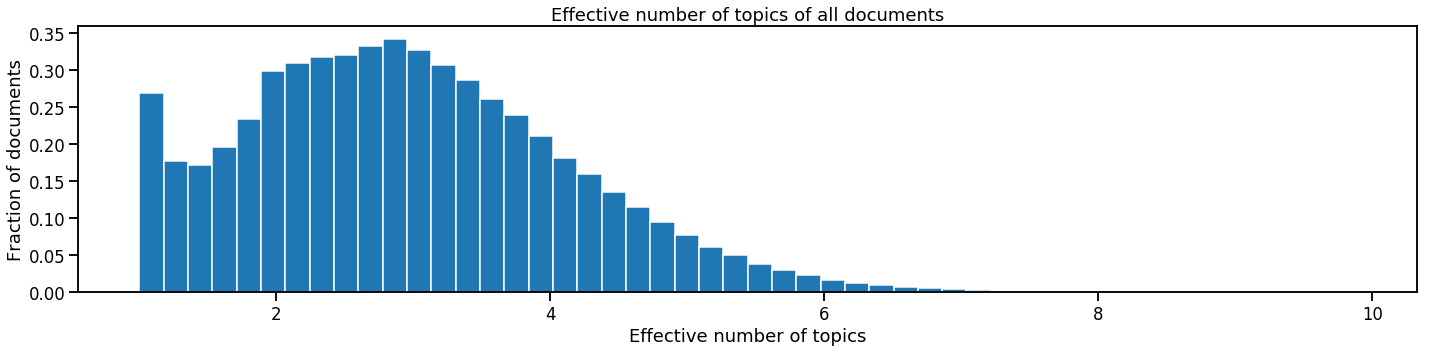

In [65]:
idx = 113971
#idx = np.random.randint(len(topics_per_document))

s = round( corrected_entropy(topics_per_document.iloc[idx]), 3 )

topics_per_document.iloc[idx].plot(kind='bar', figsize=(20,5))
plt.title("Document "+str(idx)+" - Entropy: "+str(round(s,3))+" - eff n_topics: "+str(round(2**s,2)));
plt.tight_layout()
#plt.savefig('images/topic-modelling-example.png')


plt.figure(figsize=(20,5))
plt.hist(2**all_entropies, bins=50, normed=True, edgecolor='w');
plt.ylabel('Fraction of documents')
plt.xlabel('Effective number of topics')
plt.title("Effective number of topics of all documents");
plt.tight_layout()
#plt.savefig('images/eff_n_topics.png')

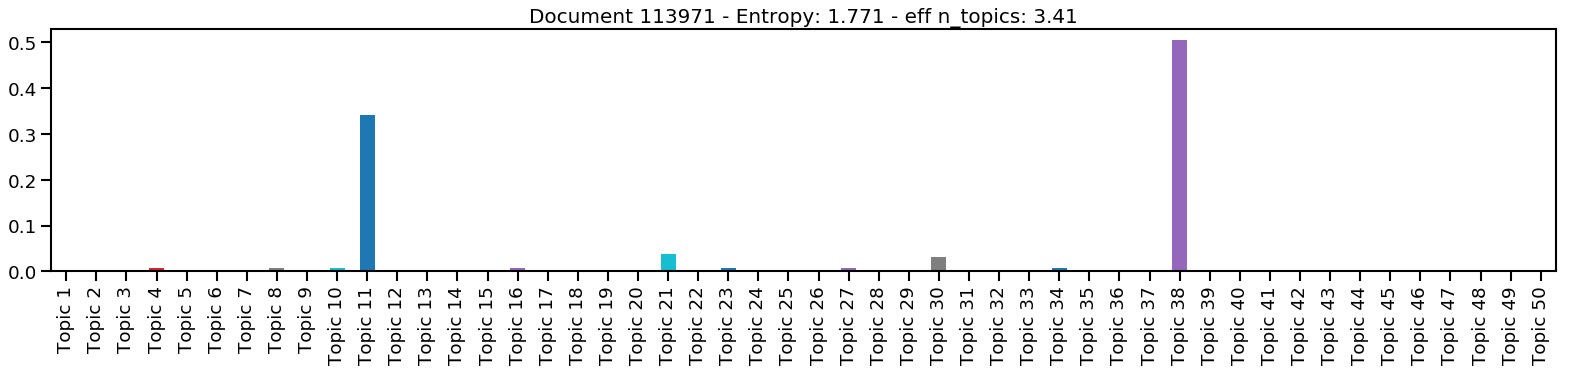

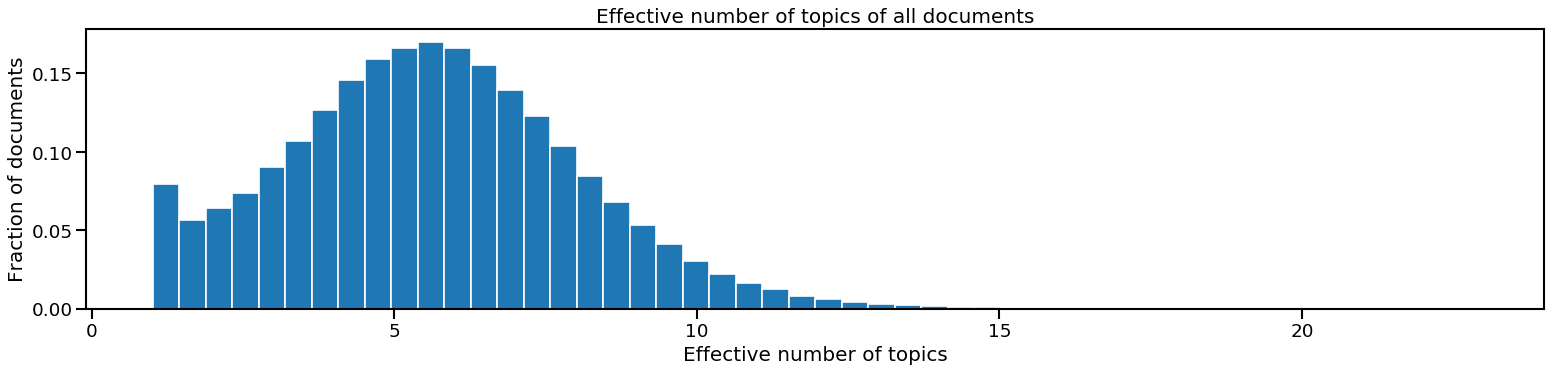

In [9]:
idx = 113971
#idx = np.random.randint(len(topics_per_document))

s = round( corrected_entropy(topics_per_document.iloc[idx]), 3 )

topics_per_document.iloc[idx].plot(kind='bar', figsize=(20,5))
plt.title("Document "+str(idx)+" - Entropy: "+str(round(s,3))+" - eff n_topics: "+str(round(2**s,2)));
plt.tight_layout()
#plt.savefig('images/topic-modelling-example.png')


plt.figure(figsize=(20,5))
plt.hist(2**all_entropies, bins=50, normed=True, edgecolor='w');
plt.ylabel('Fraction of documents')
plt.xlabel('Effective number of topics')
plt.title("Effective number of topics of all documents");
plt.tight_layout()
#plt.savefig('images/eff_n_topics.png')

In [66]:
words_per_topic.loc['Topic 1'].sort_values(ascending=False).head(15)

cent          0.015863
government    0.009015
tax           0.008739
industry      0.007297
rate          0.007078
increase      0.006693
economic      0.005775
prices        0.005735
trade         0.005349
years         0.005206
rates         0.004710
market        0.004536
policy        0.004340
price         0.004284
money         0.003967
Name: Topic 1, dtype: float64

In [13]:
words_per_topic.loc['Topic 16'].sort_values(ascending=False).head(15)

children    0.041759
women       0.032784
family      0.022860
child       0.021073
home        0.015835
mother      0.014584
parents     0.014363
wife        0.013785
mrs         0.013517
father      0.012071
life        0.011538
husband     0.011472
men         0.011180
woman       0.010775
young       0.010551
Name: Topic 16, dtype: float64

In [11]:
words_per_topic.loc['Topic 4'].sort_values(ascending=False).head(15)

war           0.025006
defence       0.024225
army          0.023290
military      0.022762
forces        0.022362
troops        0.014600
force         0.013946
general       0.012624
british       0.010384
air           0.009522
north         0.008604
men           0.007883
armed         0.007435
soldiers      0.007134
government    0.006813
Name: Topic 4, dtype: float64

In [12]:
words_per_topic.loc['Topic 13'].sort_values(ascending=False).head(15)

fashion    0.010031
food       0.008400
look       0.008217
like       0.008185
black      0.007410
white      0.006417
good       0.006102
dress      0.005760
wear       0.005403
clothes    0.004955
wine       0.004765
little     0.004684
red        0.004678
buy        0.004626
shop       0.004544
Name: Topic 13, dtype: float64

In [46]:
doc_to_date = { row.id:(row.year, row.week) for _, row in df_allnews.iterrows() }

In [47]:
all_dates = set(sorted(doc_to_date.values()))
all_documents = topics_per_document.index.values

from datetime import datetime
import time

dates = [ datetime.fromtimestamp(time.mktime(time.strptime('{} {} 1'.format(date[0],date[1]), '%Y %W %w'))) 
         for date in sorted(all_dates)]

In [67]:
doc_to_entropy = { doc:s for doc,s in zip(all_documents, all_entropies) }

date_to_entropies = []
for i,date in enumerate(all_dates):                                                          
    nl = [ doc_to_entropy[doc] for doc in doc_to_date 
           if (doc_to_date[doc]==date) and (doc in doc_to_entropy) ]
    date_to_entropies += [ nl ]

In [69]:
doc_to_n_issues   = { doc:n for doc,n in zip(all_documents, n_issues) }

date_to_n_issues = []
for i,date in enumerate(all_dates):                                                          
    nl = [ doc_to_n_issues[doc] for doc in doc_to_date 
           if (doc_to_date[doc]==date) and (doc in doc_to_n_issues) ]
    date_to_n_issues += [ nl ]

In [11]:
# save dictionaries above

outfile = 'times_data/dates.txt'
with open(outfile,'w') as f:
    f.write('\n'.join([str(i) for i in dates])+'\n')

outfile = 'times_data/date_to_entropies.csv'
with open(outfile,'w') as f:
    for j in date_to_entropies:
        f.write(','.join([str(i) for i in j])+'\n')

outfile = 'times_data/date_to_n_issue.csv'
with open(outfile,'w') as f:
    for j in date_to_n_issues:
        f.write(','.join([str(i) for i in j])+'\n')

# Calculate topic distributions per year and entropy per year

In [70]:
table = topics_per_document

topics_per_year = {}

for index, row in table.iterrows():
    topic_array = np.array(row.values,dtype=np.float64)
    if index in doc_to_date:
        year = doc_to_date[index][0]
        if year not in topics_per_year:
            topics_per_year[year]  = topic_array
        else:
            topics_per_year[year] += topic_array

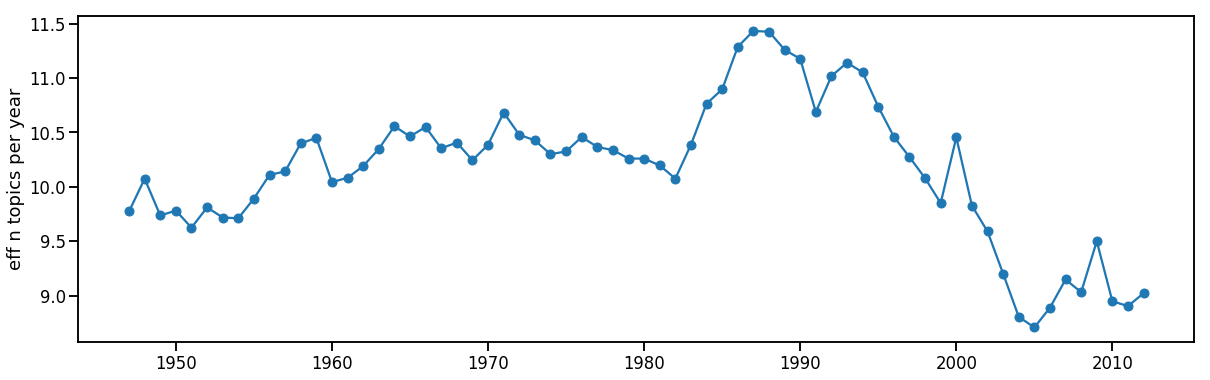

In [71]:
years = range(1947,2013)
eff_n_topics_per_year = [ 2**corrected_entropy(topics_per_year[year]) for year in years ]

plt.figure(figsize=(20,6))
plt.plot(yearrange, eff_n_topics_per_year, 'o-');
plt.ylabel('eff n topics per year');
#plt.savefig('images/eff_n_topics_per_year.png')
plt.savefig('../../../Dropbox/eff_n_topics_per_year_K%d.png' % n_topics)

In [65]:
df = pd.DataFrame({ 'eff_n_topics_per_year':eff_n_topics_per_year, 'date':yearrange })
df.to_csv('times_data/eff_n_topics_per_year.csv')

In [72]:
# Number of topics per week

table = topics_per_document

topics_per_date = {}

sorted_dates = []

for index, row in table.iterrows():
    topic_array = np.array(row.values,dtype=np.float64)
    if index in doc_to_date:
        date = doc_to_date[index]
        date = str(date[0])+'-'+str(date[1]).zfill(2)
        if date not in topics_per_date:
            topics_per_date[date]  = topic_array
            sorted_dates += [ date ]
        else:
            topics_per_date[date] += topic_array
        
sorted_dates = sorted(sorted_dates)        

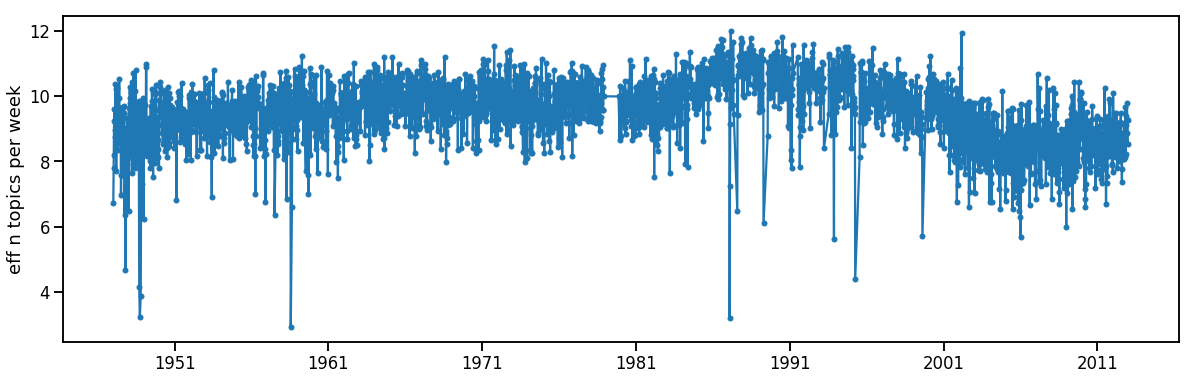

In [73]:
import time
eff_n_topics_per_week = [ 2**corrected_entropy(topics_per_date[date]) for date in sorted_dates ]

weeks_x = [ datetime.fromtimestamp(time.mktime(time.strptime('{} {} 1'.format(date[:4],date[-2:]), '%Y %W %w')))  for date in sorted_dates]

plt.figure(figsize=(20,6))
plt.plot(weeks_x, eff_n_topics_per_week, 'o-', ms=5);
plt.ylabel('eff n topics per week');
plt.show()

plt.savefig('../../../Dropbox/eff_n_topics_per_week_K%d.png' % n_topics)

In [86]:
df = pd.DataFrame({ 'eff_n_topics_per_date':eff_n_topics_per_week, 'date':sorted_dates })
df.to_csv('times_data/eff_n_topics_per_week.csv')

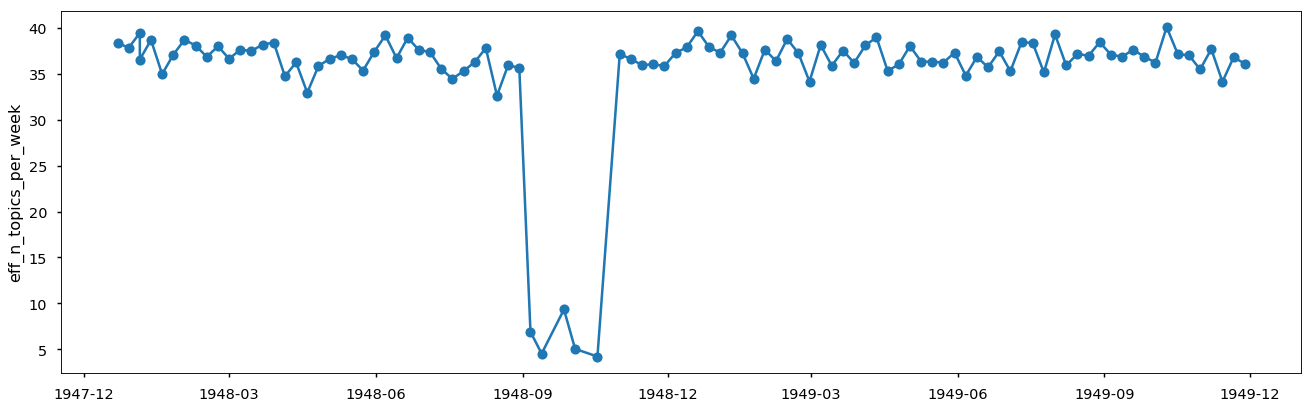

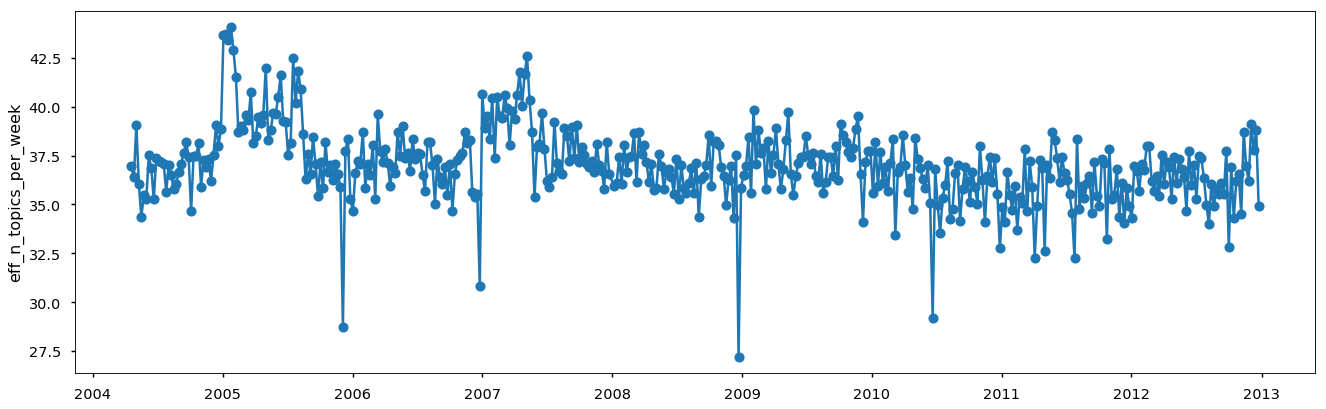

In [83]:
plt.figure(figsize=(20,6))
plt.plot(weeks_x[50:150], eff_n_topics_per_week[50:150], 'o-');
plt.ylabel('eff_n_topics_per_week');
plt.show()

plt.figure(figsize=(20,6))
plt.plot(weeks_x[2800:], eff_n_topics_per_week[2800:], 'o-');
plt.ylabel('eff_n_topics_per_week');
plt.show()

In [18]:
# Number of topics every 3 months
table = topics_per_document

topics_per_trimester = {}
sorted_trimesters = []

for index, row in table.iterrows():
    topic_array = np.array(row.values,dtype=np.float64)
    date = doc_to_date[index]
    
    trimester = str(date[0])+'-'+str( ( (date[1]-1)//3)+1 )
    if trimester not in topics_per_trimester:
        topics_per_trimester[trimester]  = topic_array
        sorted_trimesters += [ trimester ]
    else:
        topics_per_trimester[trimester] += topic_array
        
sorted_trimesters = sorted(sorted_trimesters)        

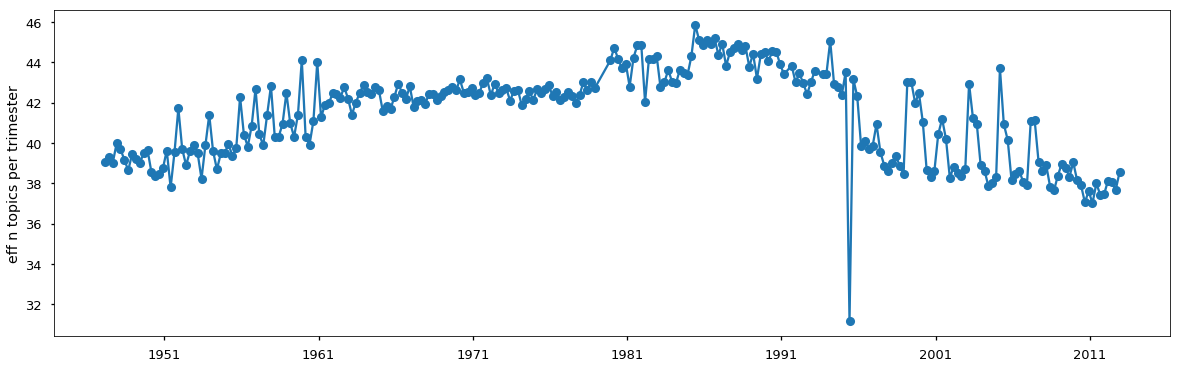

In [19]:
eff_n_topics_per_trimester = [ 2**corrected_entropy(topics_per_trimester[trimester]) for trimester in sorted_trimesters ]

trimesters_x = [ datetime.fromtimestamp(time.mktime(time.strptime('{} {} 1'.format(date[:4],3*int(date[-1:])), '%Y %m %d')))  for date in sorted_trimesters]

plt.figure(figsize=(20,6))
plt.plot(trimesters_x, eff_n_topics_per_trimester, 'o-');
plt.ylabel('eff n topics per trimester');
#plt.savefig('images/eff_n_topics_per_month.png')
plt.show()

In [20]:
df = pd.DataFrame({ 'eff_n_topics_per_date':eff_n_topics_per_trimester, 'date':trimesters_x })
df.to_csv('times_data/eff_n_topics_per_trimester.csv')

## Print number of articles over time

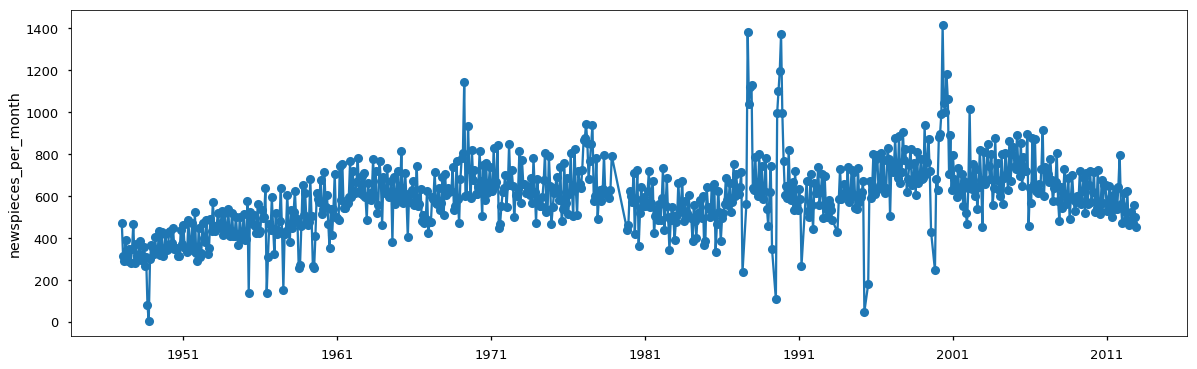

In [21]:
df = df_allnews.groupby(['year','month']).count()
newspieces_per_month = df.text.values
months_x = [ datetime.fromtimestamp(time.mktime(time.strptime('{} {} 1'.format(date[0],date[1]), '%Y %m %d'))) for date in df.index]

plt.figure(figsize=(20,6))
plt.plot(months_x, newspieces_per_month, 'o-');
plt.ylabel('newspieces_per_month');
#plt.savefig('images/newspieces_per_month.png')
plt.show()

In [22]:
df = df_allnews.groupby(['year','month']).count()
df.index[1]
df['trimester'] = [ ((date[1]-1)//3)+1 for date in df.index ]
df = df.groupby(['year','trimester']).sum()

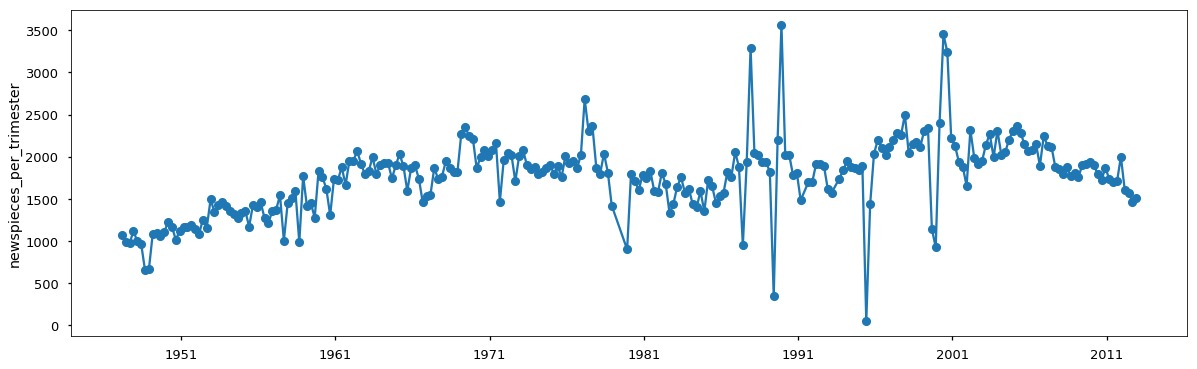

In [23]:
newspieces_per_trimester = df.text.values
trimesters_x = [ datetime.fromtimestamp(time.mktime(time.strptime('{} {} 1'.format(date[0],3*date[1]), '%Y %m %d'))) for date in df.index]

plt.figure(figsize=(20,6))
plt.plot(trimesters_x, newspieces_per_trimester, 'o-');
plt.ylabel('newspieces_per_trimester');
#plt.savefig('images/newspieces_per_trimester.png')
plt.show()

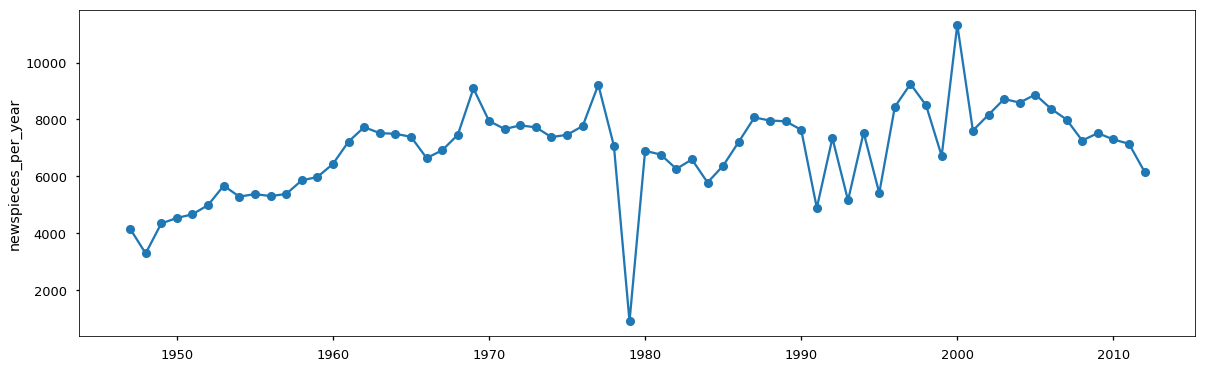

In [24]:
newspieces_per_year = df_allnews.groupby(['year']).count().text.values
years_x = yearrange

plt.figure(figsize=(20,6))
plt.plot(years_x, newspieces_per_year, 'o-');
plt.ylabel('newspieces_per_year');
#plt.savefig('images/newspieces_per_year.png')
plt.show()

In [26]:
df = pd.DataFrame({ 'newspieces_per_date':newspieces_per_year, 'date':years_x })
df.to_csv('times_data/newspieces_per_year.csv')

df = pd.DataFrame({ 'newspieces_per_date':newspieces_per_trimester, 'date':trimesters_x })
df.to_csv('times_data/newspieces_per_trimester.csv')

df = pd.DataFrame({ 'newspieces_per_date':newspieces_per_month, 'date':months_x })
df.to_csv('times_data/newspieces_per_month.csv')

In [23]:
sorted_topics_per_week = np.array([ topics_per_date[date] for date in sorted_dates ])
weeks_x = [ datetime.fromtimestamp(time.mktime(time.strptime('{} {} 1'.format(date[:4],date[-2:]), '%Y %W %w')))  for date in sorted_dates]

sorted_topics_per_year =  np.array([ topics_per_year[year] for year in yearrange ])
years_x = yearrange

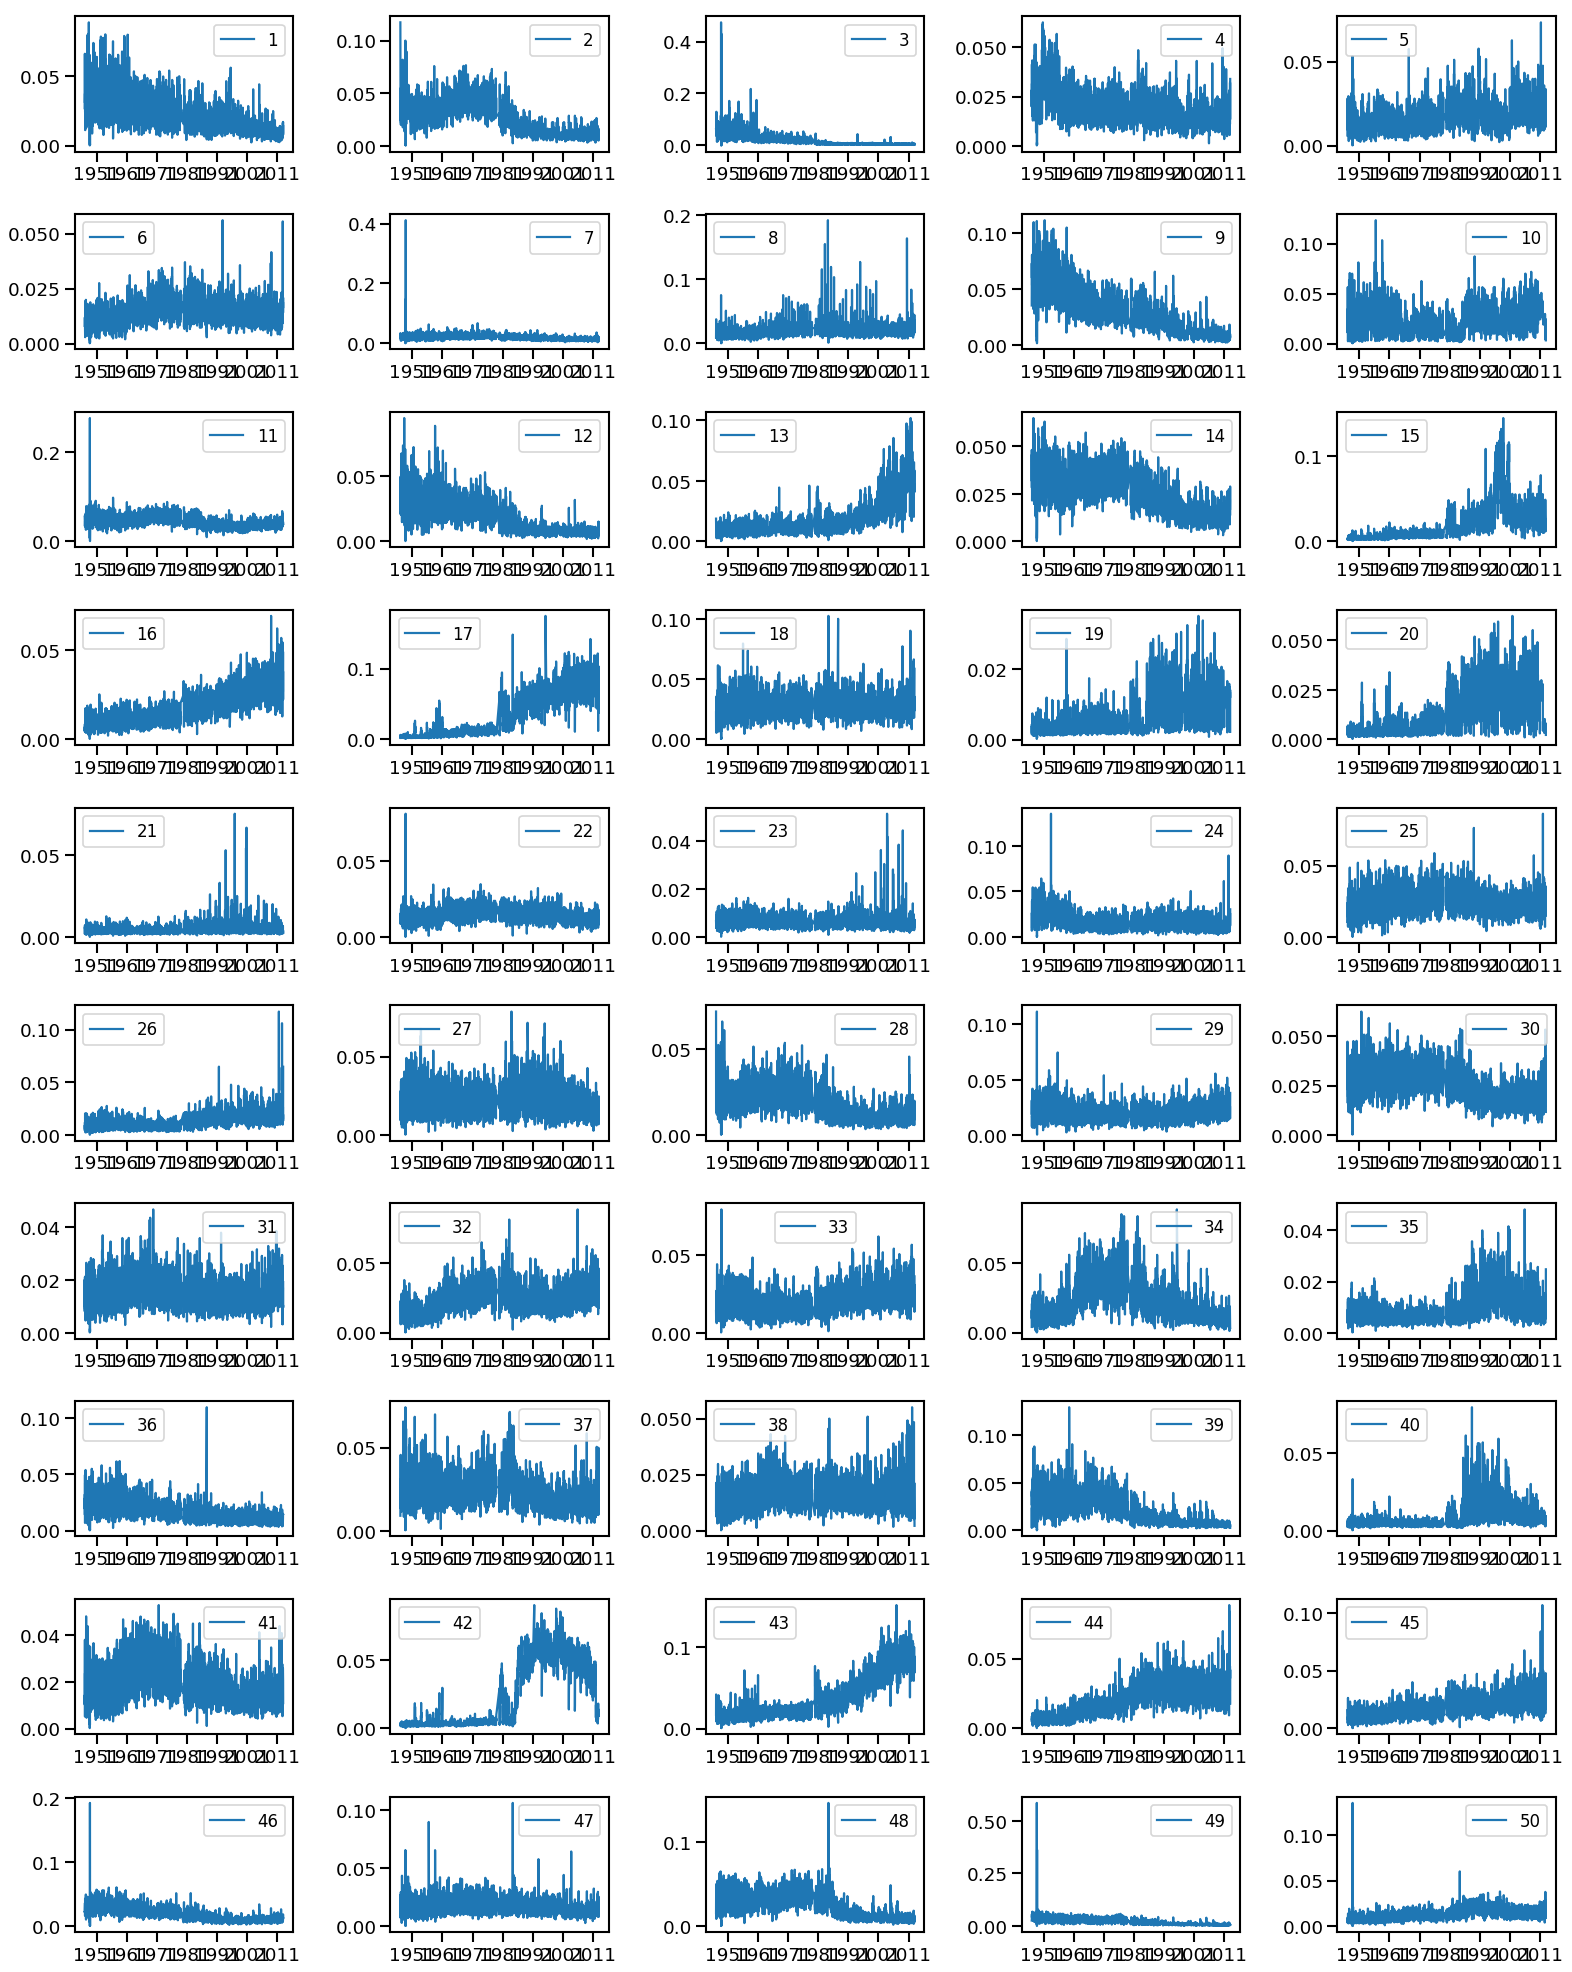

In [29]:
topics_over_weeks = np.array([ i/sum(i) for i in sorted_topics_per_week ])

fig, axs = plt.subplots(10,5,figsize=(20,25))
axs = axs.flatten()

for i,ax in enumerate(axs):
    ax.plot(weeks_x, topics_over_weeks[:,i], lw=2, label=str(i+1))
    #ax.set_ylim(0,0.06)
    ax.legend(fontsize=15)
    
plt.tight_layout()
plt.show()

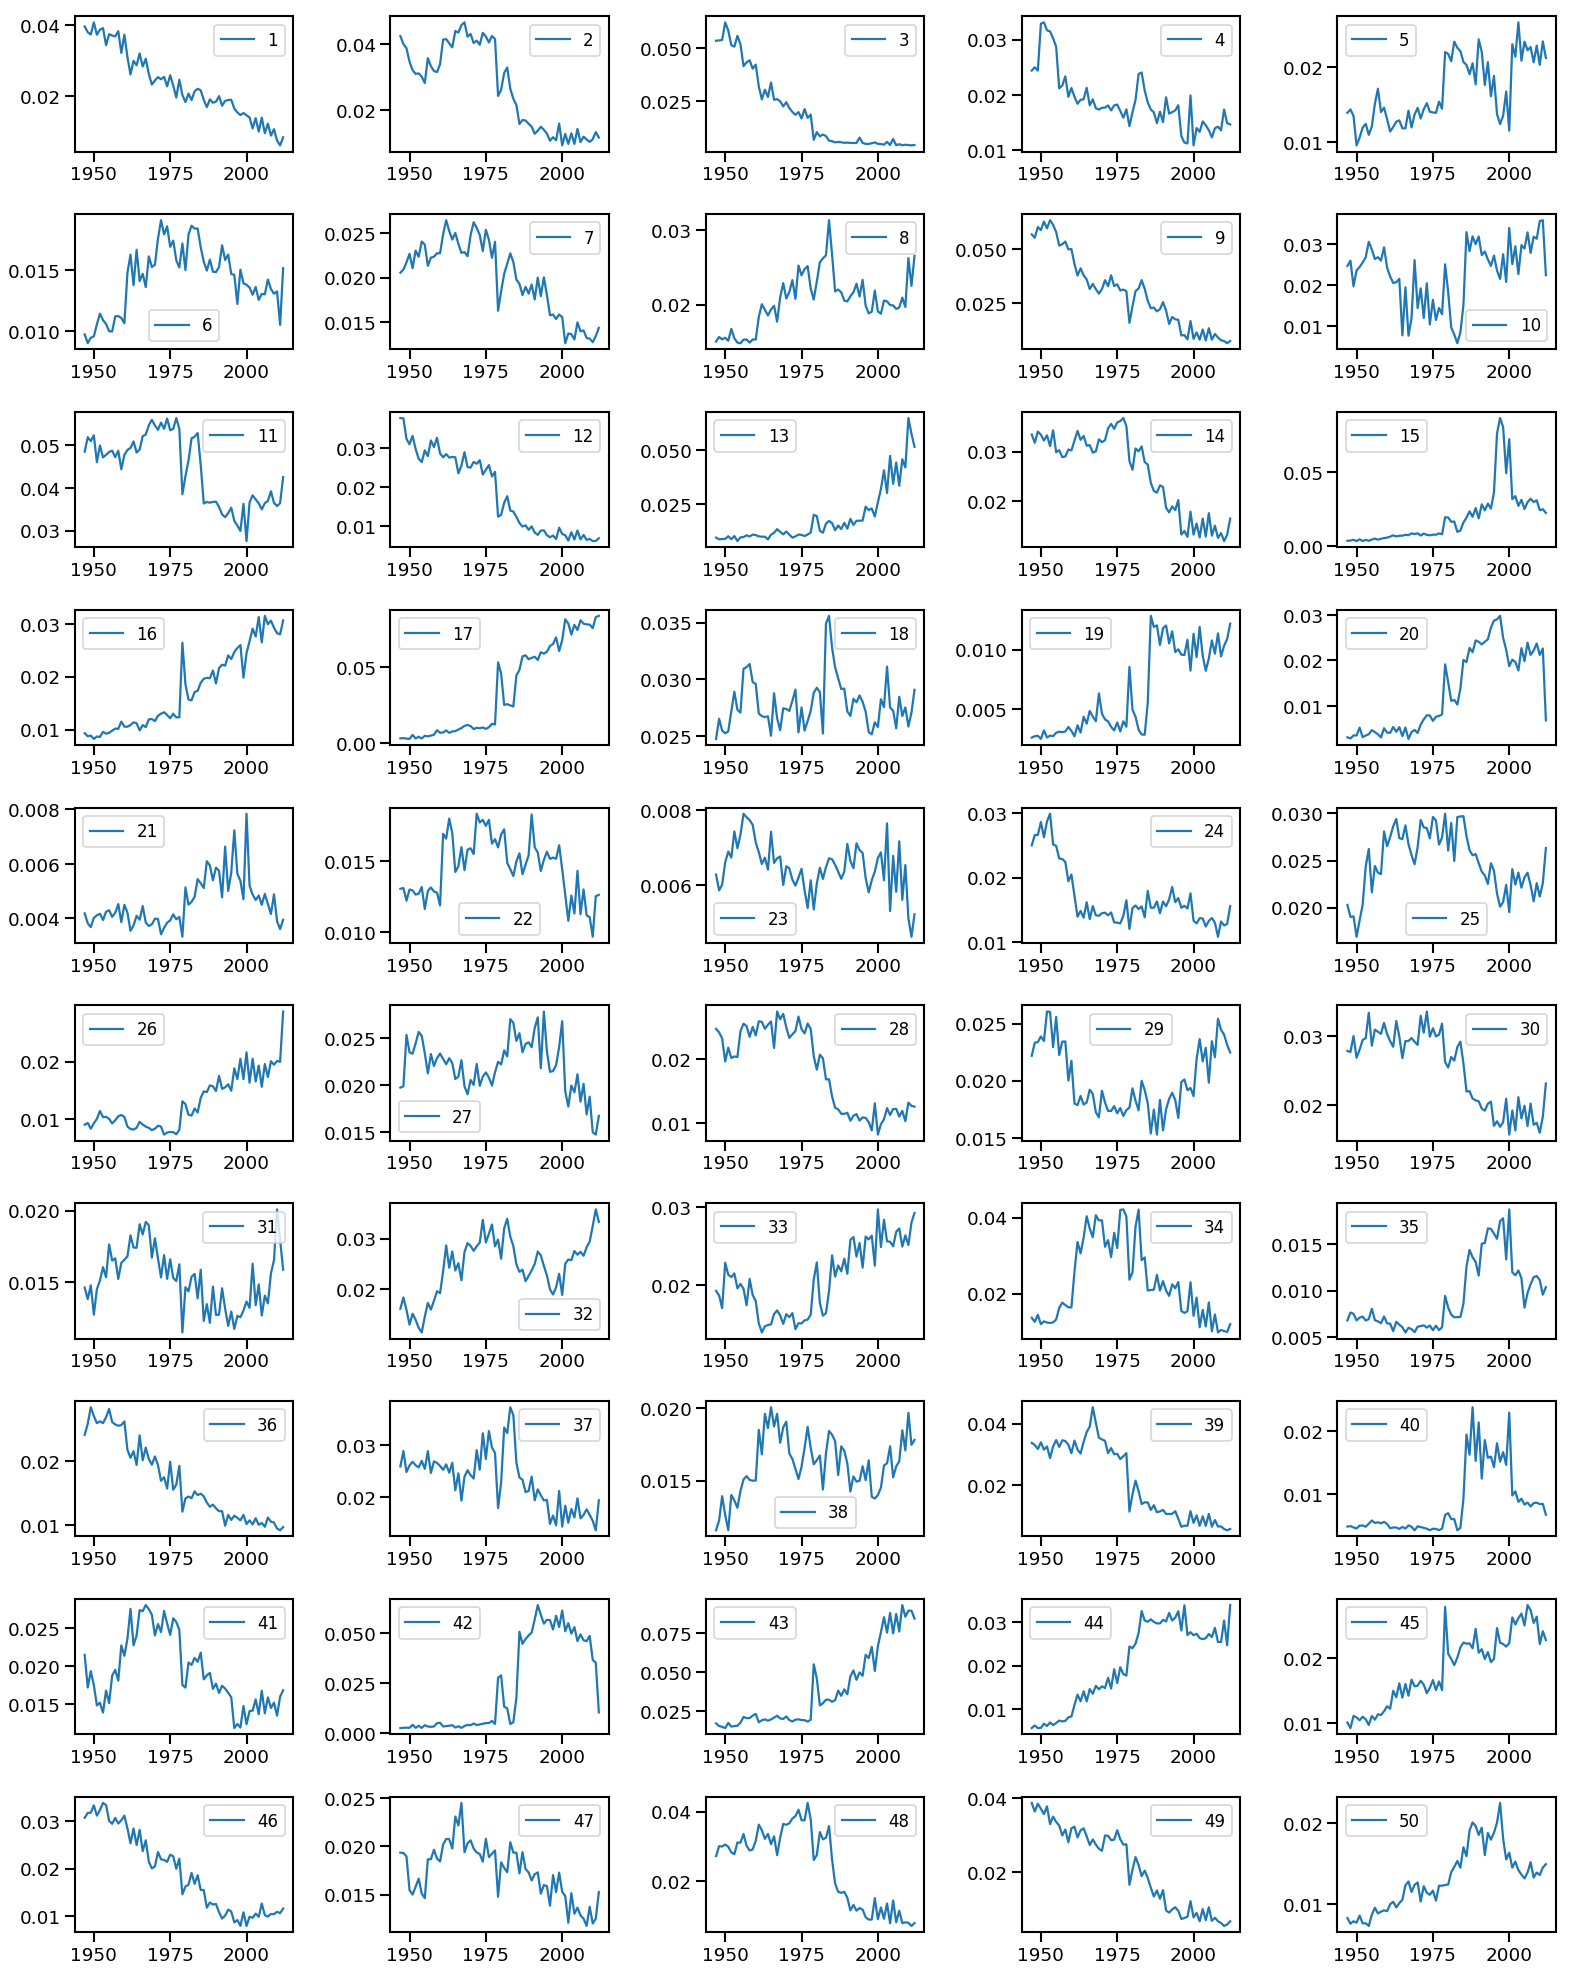

In [48]:
topics_over_years = np.array([ i/sum(i) for i in sorted_topics_per_year ])

fig, axs = plt.subplots(10,5,figsize=(20,25))
axs = axs.flatten()

for i,ax in enumerate(axs):
    ax.plot(years_x, topics_over_years[:,i], lw=2, label=str(i+1))
    #ax.set_ylim(0,0.06)
    ax.legend(fontsize=15)
    
plt.tight_layout()
plt.show()

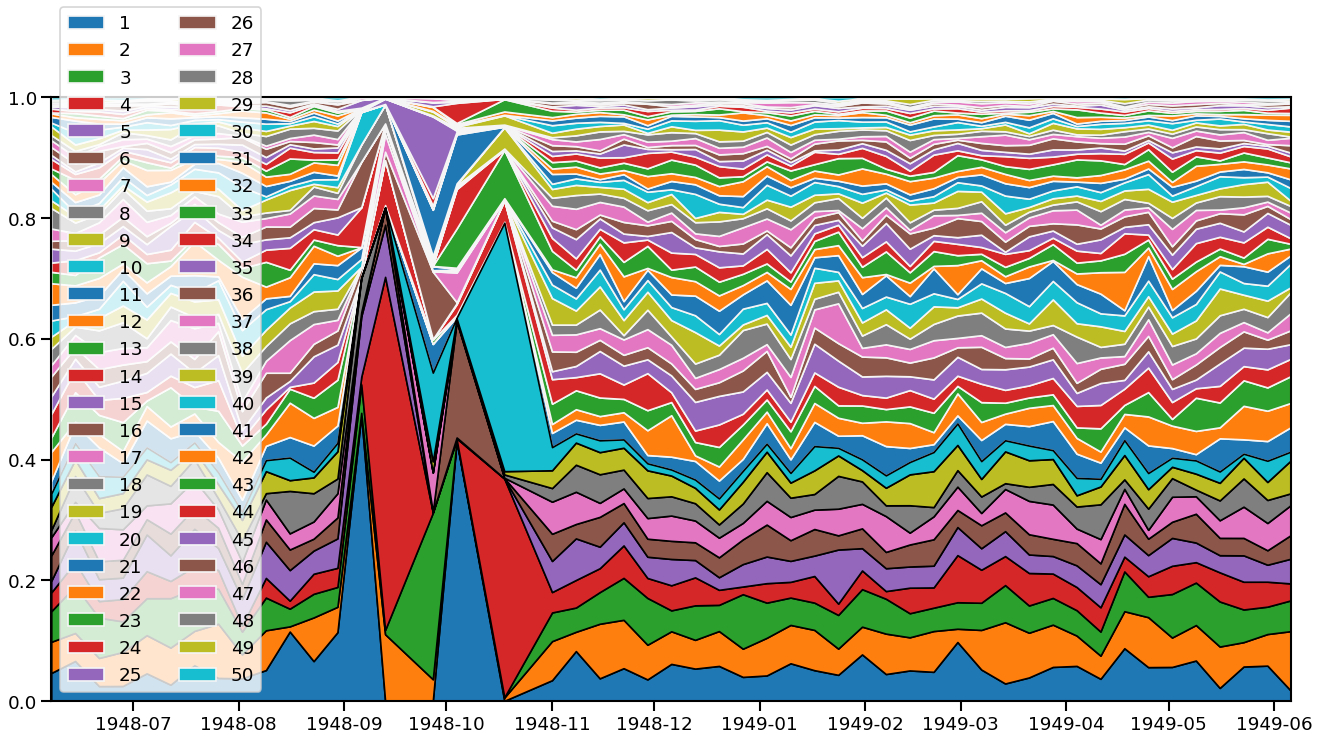

"\n# Make plot with top MIIs\n\ny = y[index_sort_all][:n_MIIs,:]\nx = range(len(y[0]))\n\nfor i in x:\n    y[:,i] /= sum(y[:,i])\n\nsums = np.array([ sum(i) for i in y ])\nindex_sort = np.argsort(sums)[::-1]\nmin_sum = 0\n\nfig, ax = plt.subplots(1, figsize=(20,10))\n\nax.stackplot(x, y, colors=colors, edgecolor='k')\n\nax.set_xticks(xticks)\nax.set_xticklabels(xticklabels)\nax.set_ylim(0,1)\nax.set_xlim(0,len(x)-1)\n\nplt.legend(table.keys()[index_sort_all][:n_MIIs], ncol=2, loc=3)\nplt.xlabel('Years',fontsize=25)\nplt.ylabel('MII proportion',fontsize=25)\n#plt.savefig('MII-per-month-rolling-mean-proportions-top.png', dpi=200)\nplt.show()\n"

In [41]:
M = np.array(topics_over_time[75:125])
x = weeks_x[75:125]

normM = []
for m in M:
    if sum(m)>0:
        normM += [ list(m/sum(m)) ]
    else:
        normM += [ list(m) ]
normM = np.array(normM)

y = normM.T.astype(float)
#x = range(len(y[0]))

n_MIIs = 10

sums = np.array([ sum(i) for i in y ])
index_sort_all = np.argsort(sums)[::-1]
min_sum = sums[index_sort_all][n_MIIs]

colors = (['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
           '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']*5)[:len(y)]

#colors = [ colors[i] if i<n_MIIs else 'lightgrey' for i in range(len(y)) ]

fig, ax = plt.subplots(1, figsize=(20,10))

ax.stackplot(x, y[index_sort_all,:],          colors=colors, edgecolor='whitesmoke')
ax.stackplot(x, y[index_sort_all,:][:n_MIIs], colors=colors, edgecolor='k')

plt.legend(range(1,51), ncol=2, loc=3)
ax.set_ylim(0,1)
ax.set_xlim(min(x),max(x))
plt.show()

"""
# Make plot with top MIIs

y = y[index_sort_all][:n_MIIs,:]
x = range(len(y[0]))

for i in x:
    y[:,i] /= sum(y[:,i])

sums = np.array([ sum(i) for i in y ])
index_sort = np.argsort(sums)[::-1]
min_sum = 0

fig, ax = plt.subplots(1, figsize=(20,10))

ax.stackplot(x, y, colors=colors, edgecolor='k')

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylim(0,1)
ax.set_xlim(0,len(x)-1)

plt.legend(table.keys()[index_sort_all][:n_MIIs], ncol=2, loc=3)
plt.xlabel('Years',fontsize=25)
plt.ylabel('MII proportion',fontsize=25)
#plt.savefig('MII-per-month-rolling-mean-proportions-top.png', dpi=200)
plt.show()
"""


In [57]:
# df = df_allnews[ (df_allnews.year==1948) & ((df_allnews.month==9) | (df_allnews.month==10)) ]

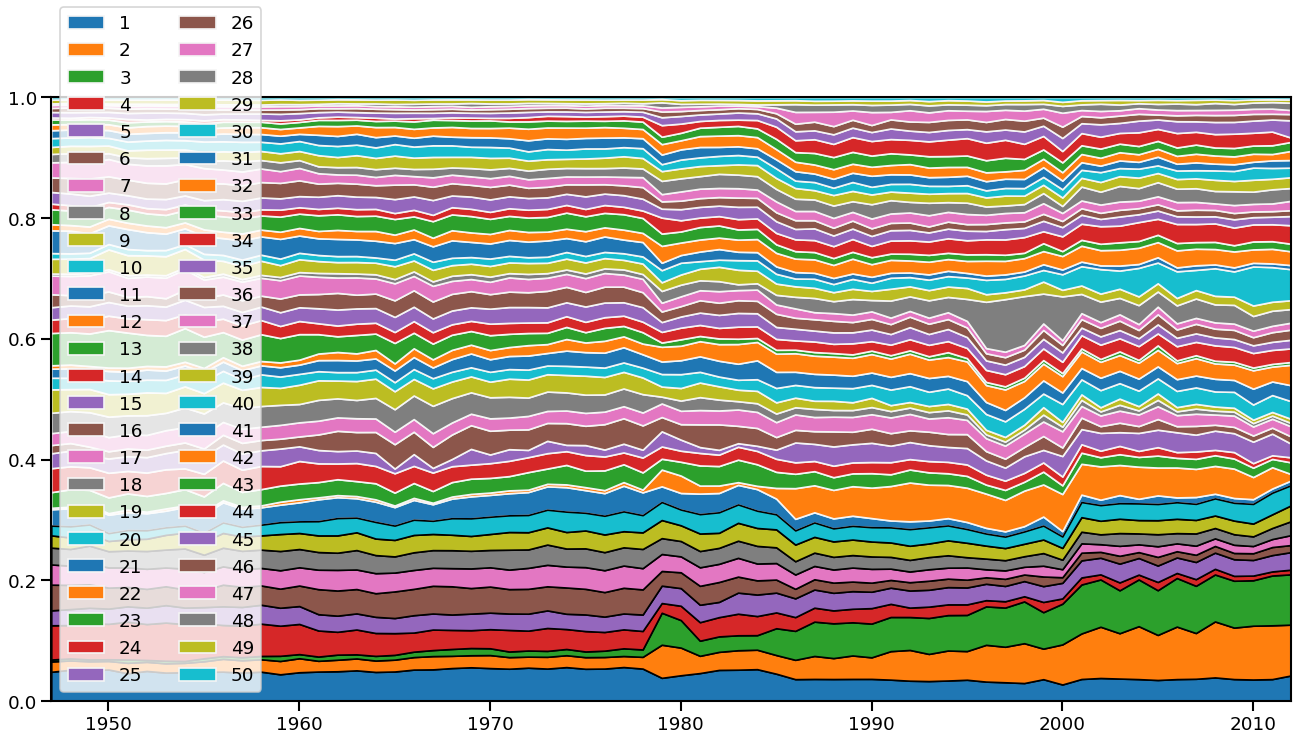

"\n# Make plot with top MIIs\n\ny = y[index_sort_all][:n_MIIs,:]\nx = range(len(y[0]))\n\nfor i in x:\n    y[:,i] /= sum(y[:,i])\n\nsums = np.array([ sum(i) for i in y ])\nindex_sort = np.argsort(sums)[::-1]\nmin_sum = 0\n\nfig, ax = plt.subplots(1, figsize=(20,10))\n\nax.stackplot(x, y, colors=colors, edgecolor='k')\n\nax.set_xticks(xticks)\nax.set_xticklabels(xticklabels)\nax.set_ylim(0,1)\nax.set_xlim(0,len(x)-1)\n\nplt.legend(table.keys()[index_sort_all][:n_MIIs], ncol=2, loc=3)\nplt.xlabel('Years',fontsize=25)\nplt.ylabel('MII proportion',fontsize=25)\n#plt.savefig('MII-per-month-rolling-mean-proportions-top.png', dpi=200)\nplt.show()\n"

In [50]:
M = np.array(topics_over_years)
x = years_x

normM = []
for m in M:
    if sum(m)>0:
        normM += [ list(m/sum(m)) ]
    else:
        normM += [ list(m) ]
normM = np.array(normM)

y = normM.T.astype(float)
#x = range(len(y[0]))

n_MIIs = 10

sums = np.array([ sum(i) for i in y ])
index_sort_all = np.argsort(sums)[::-1]
min_sum = sums[index_sort_all][n_MIIs]

colors = (['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
           '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']*5)[:len(y)]

#colors = [ colors[i] if i<n_MIIs else 'lightgrey' for i in range(len(y)) ]

fig, ax = plt.subplots(1, figsize=(20,10))

ax.stackplot(x, y[index_sort_all,:],          colors=colors, edgecolor='whitesmoke')
ax.stackplot(x, y[index_sort_all,:][:n_MIIs], colors=colors, edgecolor='k')

plt.legend(range(1,51), ncol=2, loc=3)
ax.set_ylim(0,1)
ax.set_xlim(min(x),max(x))
plt.show()

"""
# Make plot with top MIIs

y = y[index_sort_all][:n_MIIs,:]
x = range(len(y[0]))

for i in x:
    y[:,i] /= sum(y[:,i])

sums = np.array([ sum(i) for i in y ])
index_sort = np.argsort(sums)[::-1]
min_sum = 0

fig, ax = plt.subplots(1, figsize=(20,10))

ax.stackplot(x, y, colors=colors, edgecolor='k')

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylim(0,1)
ax.set_xlim(0,len(x)-1)

plt.legend(table.keys()[index_sort_all][:n_MIIs], ncol=2, loc=3)
plt.xlabel('Years',fontsize=25)
plt.ylabel('MII proportion',fontsize=25)
#plt.savefig('MII-per-month-rolling-mean-proportions-top.png', dpi=200)
plt.show()
"""


In [142]:
i = 48
words_per_topic.loc['Topic %d' % i].sort_values(ascending=False).head(15)

union         0.037323
workers       0.023878
strike        0.016876
unions        0.016681
pay           0.015368
yesterday     0.013003
labour        0.012570
national      0.012334
trade         0.012207
work          0.011919
industrial    0.010078
week          0.009846
general       0.009568
members       0.009519
men           0.008336
Name: Topic 48, dtype: float64

In [136]:
i = 42
words_per_topic.loc['Topic %d' % i].sort_values(ascending=False).head(15)

ing        0.033106
tion       0.020062
ment       0.016601
con        0.011237
com        0.010603
tions      0.007696
people     0.006789
pro        0.006450
ers        0.006070
million    0.005861
ofthe      0.004818
says       0.004675
govern     0.004588
years      0.004560
sion       0.004115
Name: Topic 42, dtype: float64

In [121]:
i = 40
words_per_topic.loc['Topic %d' % i].sort_values(ascending=False).head(15)

bed         0.030339
house       0.025943
flat        0.024440
tel         0.023483
room        0.017485
garden      0.013242
bath        0.012956
beds        0.012307
large       0.010881
kitchen     0.009167
park        0.007843
kit         0.007634
property    0.007189
floor       0.007088
sale        0.006795
Name: Topic 40, dtype: float64

In [122]:
i = 46
words_per_topic.loc['Topic %d' % i].sort_values(ascending=False).head(15)

south           0.029890
government      0.024764
africa          0.023650
african         0.019441
british         0.019011
china           0.017183
india           0.016089
chinese         0.014043
commonwealth    0.011334
minister        0.011092
united          0.010797
indian          0.010673
britain         0.010472
country         0.009321
foreign         0.009010
Name: Topic 46, dtype: float64

In [123]:
i = 15
words_per_topic.loc['Topic %d' % i].sort_values(ascending=False).head(15)

says           0.014401
work           0.013841
business       0.011505
computer       0.010642
office         0.010173
company        0.009932
skills         0.007742
good           0.006895
internet       0.006841
information    0.006731
use            0.006253
working        0.005842
people         0.005622
job            0.005615
technology     0.005520
Name: Topic 15, dtype: float64